In [1]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pd_explain

usetex-False


In [2]:
songs_df = pd.read_csv(r"..\Examples\Datasets\spotify_all.csv")

In [3]:
artist = 'Metro Boomin'

In [4]:
def is_by_artist(row):
    list = [a[1:-1] for a in row['artists'][1:-1].split(', ')]
    # if artist in list:
        # print(list)
    return True if artist in list else False

In [5]:
songs_df[f'Is By {artist}'] = songs_df.apply(is_by_artist, axis=1)

In [6]:
songs_df[f'Is By {artist}'].value_counts()

Is By Metro Boomin
False    174367
True         22
Name: count, dtype: int64

In [7]:
artist_colabs = songs_df[(songs_df[f'Is By {artist}'] == True) & (songs_df['artists'].str.contains(','))][['artists']].drop_duplicates().reset_index(drop=True)

In [8]:
songs_df[f'Is By {artist}'].value_counts()

Is By Metro Boomin
False    174367
True         22
Name: count, dtype: int64

In [9]:
artist_featuring = songs_df[(songs_df[f'Is By {artist}'] == True)][['main_artist']].drop_duplicates().reset_index(drop=True)
# 

In [10]:
artist_featuring

,main_artist
0,21 Savage
1,Offset
2,Metro Boomin
3,NAV
4,Big Sean
5,James Blake


In [11]:
relevant = songs_df[songs_df[f'Is By {artist}'] == True]

In [12]:
all = artist_featuring.join(relevant, on='main_artist', how='inner')
all

,index,main_artist,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,...,name,popularity,speechiness,tempo,valence,year,decade,popularity_score,duration_minutes,Is By Metro Boomin
0,0,21 Savage,0.373000,"['21 Savage', 'Metro Boomin', 'Future']",0.835,0.413,1,6fwdbPMwP1zVStm8FybmkO,0.001330,1,...,X (feat. Future),72,0.3960,149.004,0.1110,2016,2010,70,4.314667,True
1,0,21 Savage,0.007480,"['21 Savage', 'Metro Boomin']",0.819,0.626,1,5SWnsxjhdcEDc7LJjq9UHk,0.101000,10,...,Runnin,84,0.2020,143.010,0.4150,2020,2020,80,3.265100,True
2,0,21 Savage,0.231000,"['21 Savage', 'Metro Boomin', 'Drake']",0.647,0.667,1,4Q34FP1AT7GEl9oLgNtiWj,0.000000,5,...,Mr. Right Now (feat. Drake),82,0.3040,172.080,0.7040,2020,2020,80,3.230650,True
3,0,21 Savage,0.136000,"['21 Savage', 'Metro Boomin']",0.906,0.444,1,4gmmRb6bZJffOOiww1JGTO,0.000064,4,...,No Heart,71,0.3840,140.063,0.6780,2016,2010,70,3.917333,True
4,0,21 Savage,0.331000,"['21 Savage', 'Offset', 'Metro Boomin', 'Travi...",0.782,0.436,1,5u6vkDnOyaf8LsteDAj2ub,0.000013,2,...,Ghostface Killers,71,0.1550,82.994,0.2430,2017,2010,70,4.482217,True
5,0,21 Savage,0.349000,"['21 Savage', 'Metro Boomin', 'Young Thug']",0.825,0.733,1,3ruoIF2UnoXdzK8mR61ebq,0.000000,1,...,Rich Nigga Shit (feat. Young Thug),76,0.0969,97.974,0.6200,2020,2020,70,3.172183,True
6,0,21 Savage,0.005740,"['21 Savage', 'Metro Boomin']",0.847,0.733,1,6pcywuOeGGWeOQzdUyti6k,0.000010,10,...,Glock In My Lap,75,0.1600,130.029,0.2020,2020,2020,70,3.226517,True
7,0,21 Savage,0.000647,"['21 Savage', 'Metro Boomin']",0.635,0.793,1,3CDVMejYHnB1SkEEx0T1N4,0.747000,10,...,Many Men,72,0.0322,77.594,0.2810,2020,2020,70,3.364267,True
8,0,21 Savage,0.005250,"['21 Savage', 'Offset', 'Metro Boomin', 'Quavo']",0.845,0.399,1,0tdCy39PgWN8LFWu34ORn3,0.740000,1,...,Rap Saved Me,65,0.3090,143.049,0.1480,2017,2010,60,4.293333,True
9,0,21 Savage,0.001630,"['21 Savage', 'Metro Boomin']",0.774,0.706,1,7fxSLnklnayJNBIKntXedZ,0.000001,2,...,Slidin,70,0.3550,152.891,0.3820,2020,2020,70,3.083950,True


In [13]:
all.groupby('main_artist').popularity.mean()

main_artist
21 Savage       72.818182
Big Sean        64.000000
James Blake     68.000000
Metro Boomin    71.166667
NAV             62.000000
Offset          81.000000
Name: popularity_mean, dtype: float64

0
1
2
3
4
5


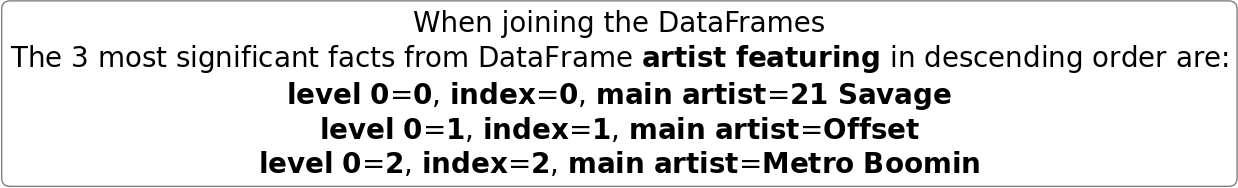

In [14]:
all.explain(explainer='shapley', value='mean', attr='popularity', consider='left', top_k=3)